### Multiple linear regression

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable. Example: Prediction of CO2 emission based on engine size and number of cylinders in a car.

y= b0 + b1x1 +b2x2+ ......+ bnxn + e



y= dependent variable,response,observation
x= independent variable,predictor,expalnatory variable
b = coefficient
b0=
e= random error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as seabornInstance

In [3]:
df = pd.read_csv('/home/pooja/Downloads/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [4]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
df = df.fillna(method='ffill') #forward fill ,used to fill preceding values

Now let's devide df into x=attributes,y=labels'

In [22]:
x= df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y= df['quality'].values

In [23]:
x  #MaxTemp,minTemp

array([[  7.4  ,   0.7  ,   0.   , ...,   3.51 ,   0.56 ,   9.4  ],
       [  7.8  ,   0.88 ,   0.   , ...,   3.2  ,   0.68 ,   9.8  ],
       [  7.8  ,   0.76 ,   0.04 , ...,   3.26 ,   0.65 ,   9.8  ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   3.42 ,   0.75 ,  11.   ],
       [  5.9  ,   0.645,   0.12 , ...,   3.57 ,   0.71 ,  10.2  ],
       [  6.   ,   0.31 ,   0.47 , ...,   3.39 ,   0.66 ,  11.   ]])

In [24]:
y #MeamTemp

array([5, 5, 5, ..., 6, 5, 6])

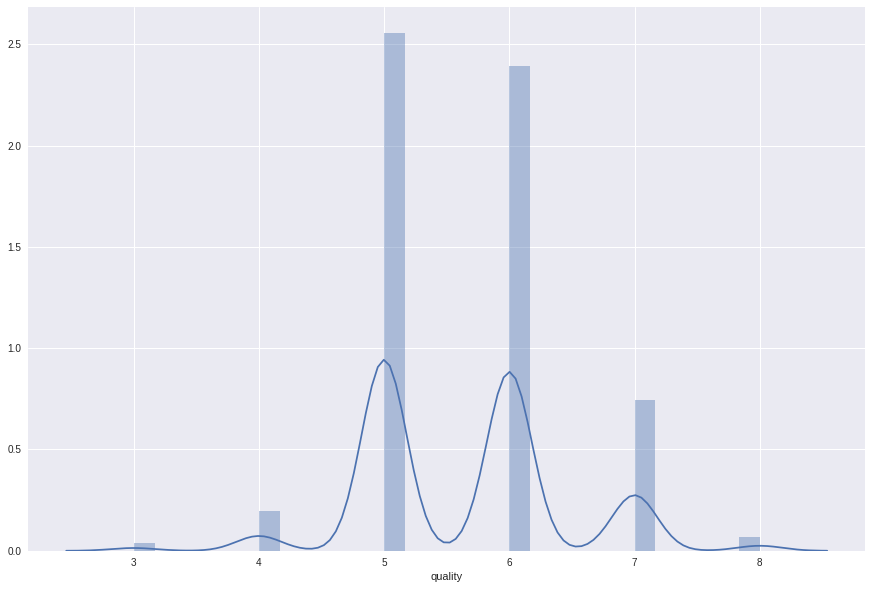

In [25]:
plt.figure(figsize=(15,10))
#plt.tight_layout()
seabornInstance.distplot(df['quality']) # avarage value of mintemp column

Average mintemp is 5 and 6

**Model Training**

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
#training of model
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

in case of multivariable LR ,the reression model has to find the most optimal coefficient for allthe attributes. To see what coefficients our regression model has chosen,execute following

In [34]:
coeff_df = pd.DataFrame(lr.coef_)
coeff_df

,0
0,0.041284
1,-1.149528
2,-0.177927
3,0.027870
4,-1.873407
5,0.002684
6,-0.002777
7,-31.516666
8,-0.254486
9,0.924040


In [35]:
y_pred=lr.predict(x_test)

In [36]:
df1= pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df1.head(25)

,Actual,predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


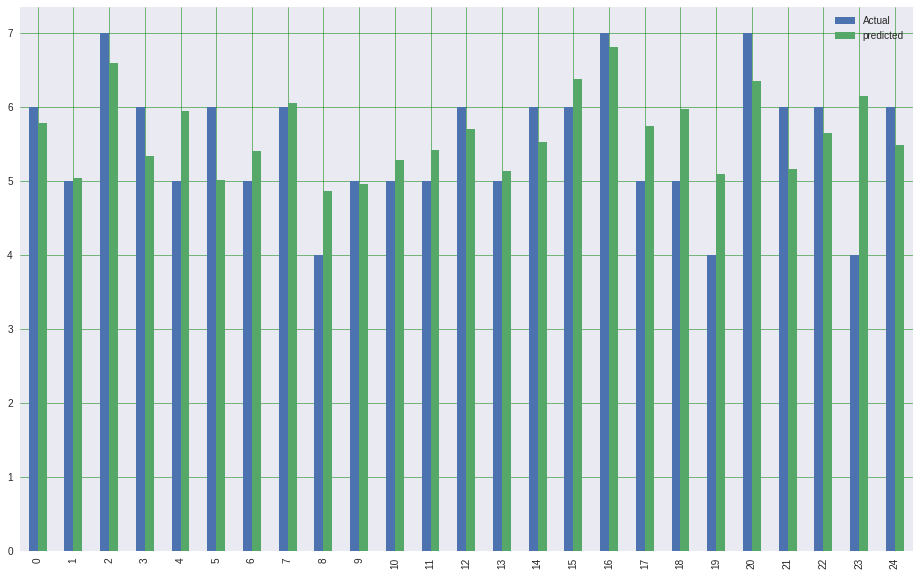

In [37]:
# plot actual and predicted values
df2=df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',c='g')
plt.grid(which='minor',linestyle=':',linewidth='0.5',c='r')
plt.show()

**Model Evaluation**

In [39]:
print('mean absolute error:', metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

('mean absolute error:', 0.46963309286611132)
('mean squared error:', 0.38447119782012484)
('root mean squared error:', 0.62005741493842714)


value of root squared mean error is 0.62 which slightly greater than 10% of mean value which is 5.63.this means that our algorithm is not very accurte but stiil makes good prdiction

In [40]:
lr.predict([[7.4,0.700 ,0.00 ,1.9 ,0.076,11.0 ,34.0 ,0.99780 ,3.51 ,0.56 ,9.4 ]])

array([ 5.03938153])

In [41]:
lr.predict([[7.4,0.00 ,0.00 ,1.9 ,0.00,0.00 ,0.00 ,0.00 ,0.00 ,0.56 ,9.4 ]])

array([ 38.39191977])